# KNN self implementation
It is classification algorithm.
In this we find the k nearest neighbour and classify the test point according to that.
Feature scaling is must so that every feature gets same weightage

In [20]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter

In [2]:
dataset = datasets.load_breast_cancer()
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [3]:
X_train,X_test,Y_train,Y_test = train_test_split(dataset.data,dataset.target,test_size = 0.2,random_state = 1)

In [4]:
clf = KNeighborsClassifier(n_neighbors=7)
clf

KNeighborsClassifier(n_neighbors=7)

In [5]:
clf.fit(X_train,Y_train)
clf

KNeighborsClassifier(n_neighbors=7)

In [6]:
clf.score(X_test,Y_test)

0.9385964912280702

# cross validation
lets split the data training data into k parts and choose k-1 parts to train and test it on remaining part and do this for k times...do this for different k values and finally we can see how good or bad or classifier is performing.

In [7]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import cross_val_score,train_test_split,KFold
from sklearn.linear_model import LinearRegression

In [8]:
iris = datasets.load_iris()
xtrain,xtest,ytrain,ytest = train_test_split(iris.data,iris.target,test_size = 0.3)

In [9]:
clf = LinearRegression()
cross_val_score(clf,iris.data,iris.target,cv = KFold(3,False,0))

c:\users\nikhi\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass shuffle=False, random_state=0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
c:\users\nikhi\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


array([0., 0., 0.])

--Find best possible value of k--

In [10]:
x_axis = []
y_axis = []
for i in range(1,26,2):
    clf = KNeighborsClassifier(n_neighbors=i)
    score = (cross_val_score(clf,X_train,Y_train,cv = KFold(5,True,0)))
    x_axis.append(i)
    y_axis.append(score.mean())
    print(i,score.mean())

c:\users\nikhi\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass shuffle=True, random_state=0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
c:\users\nikhi\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass shuffle=True, random_state=0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
c:\users\nikhi\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass shuffle=True, random_state=0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
c:\users\nikhi\appdata\local\programs\python\python38\lib\site-p

1 0.9164835164835164
3 0.9252747252747252
5 0.9208791208791208
7 0.9208791208791208


c:\users\nikhi\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass shuffle=True, random_state=0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
c:\users\nikhi\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass shuffle=True, random_state=0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
c:\users\nikhi\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass shuffle=True, random_state=0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
c:\users\nikhi\appdata\local\programs\python\python38\lib\site-p

9 0.9296703296703297
11 0.9340659340659341
13 0.9362637362637363
15 0.9340659340659341
17

c:\users\nikhi\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass shuffle=True, random_state=0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
c:\users\nikhi\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass shuffle=True, random_state=0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
c:\users\nikhi\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass shuffle=True, random_state=0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
c:\users\nikhi\appdata\local\programs\python\python38\lib\site-p

 0.9318681318681319
19 0.9296703296703297
21 0.9274725274725275
23 0.9296703296703297
25 0.9230769230769231


c:\users\nikhi\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass shuffle=True, random_state=0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [11]:
from matplotlib import pyplot as plt

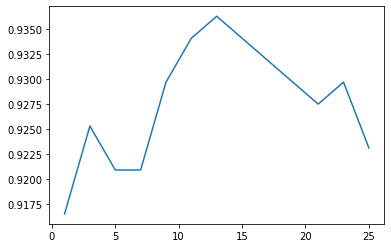

In [12]:
plt.plot(x_axis,y_axis)
plt.show()

# Self Implementation

In [29]:
def train(x,y):
    return
def predictOne(X_train,Y_train,x_test,k):
    distances = []
    for i in range(len(X_train)):
        distance = ((X_train[i,:] - x_test)**2).sum()
        distances.append([distance,i])
    distances = sorted(distances)
    targets = []
    for i in range(k):
        targets.append(Y_train[distances[i][1]])
    return Counter(targets).most_common(1)[0][0]
def predict(X_train,Y_train,x_test_data,k):
    predictions = []
    for x_test in x_test_data:
        predictions.append(predictOne(X_train,Y_train,x_test,k))
    return predictions

In [36]:
y_pred = predict(X_train,Y_train,X_test,15)
accuracy_score(Y_test,y_pred)

0.9210526315789473